In [1]:
from keras import layers
from keras import models

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

Using TensorFlow backend.


In [2]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [3]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [5]:
from keras.datasets import mnist 
from keras.utils import to_categorical 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

train_images = train_images.reshape((60000, 28, 28, 1)) 
train_images = train_images.astype('float32') / 255 

test_images = test_images.reshape((10000, 28, 28, 1)) 
test_images = test_images.astype('float32') / 255 

train_labels = to_categorical(train_labels) 

test_labels = to_categorical(test_labels)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) 
model.fit(train_images, train_labels, epochs=5, batch_size=64) 

Epoch 1/5
60000/60000 [==============================] - 51s 842us/step - loss: 0.1757 - accuracy: 0.9448
Epoch 2/5
60000/60000 [==============================] - 48s 806us/step - loss: 0.0480 - accuracy: 0.9853
Epoch 3/5
60000/60000 [==============================] - 47s 789us/step - loss: 0.0328 - accuracy: 0.9901
Epoch 4/5
60000/60000 [==============================] - 49s 817us/step - loss: 0.0248 - accuracy: 0.9922
Epoch 5/5
60000/60000 [==============================] - 47s 788us/step - loss: 0.0195 - accuracy: 0.9937


In [6]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
test_acc

10000/10000 [==============================] - 3s 255us/step


0.9890999794006348

In [2]:
import os, shutil 
original_dataset_dir = 'C:/Users/willk/Desktop/Kim/train' # 원본 데이터셋 
base_dir = 'C:/Users/willk/Desktop/Kim/small' # 소규모 데이터셋 
os.mkdir(base_dir) 
train_dir = os.path.join(base_dir, 'train') # 훈련, 검증, 테스트 분할 
os.mkdir(train_dir) 
validation_dir = os.path.join(base_dir, 'validation') 
os.mkdir(validation_dir) 
test_dir = os.path.join(base_dir, 'test') 
os.mkdir(test_dir) 
train_cats_dir = os.path.join(train_dir, 'cats') # 훈련용 고양이 
os.mkdir(train_cats_dir) 
train_dogs_dir = os.path.join(train_dir, 'dogs') # 훈련용 강아지 
os.mkdir(train_dogs_dir) 
validation_cats_dir = os.path.join(validation_dir, 'cats') # 검증용 고양이 
os.mkdir(validation_cats_dir) 
validation_dogs_dir = os.path.join(validation_dir, 'dogs') # 검증용 강아지 
os.mkdir(validation_dogs_dir) 
test_cats_dir = os.path.join(test_dir, 'cats') # 테스트용 고양이 
os.mkdir(test_cats_dir) 
test_dogs_dir = os.path.join(test_dir, 'dogs') # 테스트용 강아지 
os.mkdir(test_dogs_dir)

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'C:/Users/willk/Desktop/Kim/small'

In [3]:
fnames=['cat.{}.jpg'.format(i) for i in range(1000)] # 처음 1,000개의 고양이 이미지 
for fname in fnames: 
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(train_cats_dir, fname) 
    shutil.copyfile(src, dst) # train_cats_dir에 복사 
    
fnames=['cat.{}.jpg'.format(i) for i in range(1000, 1500)]#다음 500개 고양이 이미지 
for fname in fnames: 
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(validation_cats_dir, fname) 
    shutil.copyfile(src, dst) # validation_cats_dir에 복사 
    
fnames=['cat.{}.jpg'.format(i) for i in range(1500, 2000)] #다음 500개 고양이 이미지 
for fname in fnames: 
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname) 
    shutil.copyfile(src, dst) # test_cats_dir에 복사
    
fnames=['dog.{}.jpg'.format(i) for i in range(1000)] # 처음 1,000개의 강아지 이미지 
for fname in fnames: 
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(train_dogs_dir, fname) 
    shutil.copyfile(src, dst) # train_dogs_dir에 복사 

fnames=['dog.{}.jpg'.format(i) for i in range(1000, 1500)]#다음 500개 강아지 이미지  
for fname in fnames: 
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(validation_dogs_dir, fname) 
    shutil.copyfile(src, dst) # validation_dogs_dir에 복사 
    
fnames=['dog.{}.jpg'.format(i) for i in range(1500, 2000)]#다음 500개 강아지 이미지 
for fname in fnames: 
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(test_dogs_dir, fname) 
    shutil.copyfile(src, dst) # test_dogs_dir에 복사

NameError: name 'train_cats_dir' is not defined

In [4]:
print('total training cat images:', len(os.listdir(train_cats_dir))) 

NameError: name 'train_cats_dir' is not defined

In [10]:
print('total training dog images:', len(os.listdir(train_dogs_dir))) 

total training dog images: 1000


In [11]:
print('total validation cat images:', len(os.listdir(validation_cats_dir))) 

total validation cat images: 500


In [12]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir))) 

total validation dog images: 500


In [13]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [14]:
print('total test dog images:', len(os.listdir(test_dogs_dir))) 

total test dog images: 500


In [15]:
from keras import layers 
from keras import models 
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) # 148×148 
model.add(layers.MaxPooling2D((2, 2))) # 74×74   
model.add(layers.Conv2D(64, (3, 3), activation='relu'))# 72×72 
model.add(layers.MaxPooling2D((2, 2))) # 36×36 
model.add(layers.Conv2D(128, (3, 3), activation='relu'))# 34×34 
model.add(layers.MaxPooling2D((2, 2))) # 17×17 
model.add(layers.Conv2D(128, (3, 3), activation='relu'))# 15×15 
model.add(layers.MaxPooling2D((2, 2))) # 7×7 
model.add(layers.Flatten()) # 6272 
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [17]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [18]:
from keras.preprocessing.image import ImageDataGenerator 
train_datagen = ImageDataGenerator(rescale=1./255) # Rescale 
test_datagen = ImageDataGenerator(rescale=1./255) 

train_generator = train_datagen.flow_from_directory( #이미지를 불러올 때 폴더명에 맞춰 자동으로 labelling 
    train_dir,   # 타깃 디렉터리 
    target_size=(150, 150), # JPEG content to 150×150 RGB 
    batch_size=20, 
    class_mode='binary') # 이진 레이블, 2개 폴더-cats, dogs 
validation_generator = test_datagen.flow_from_directory( validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
for data_batch, labels_batch in train_generator: 
    print('data batch shape:', data_batch.shape) 
    print('labels batch shape:', labels_batch.shape) 
    break 

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [20]:
history = model.fit_generator(train_generator, # 20   
                              steps_per_epoch=100, # 20 batches*100 steps=2000 
                              epochs=30, 
                              validation_data=validation_generator, 
                              validation_steps=50) # 20 batches * 50 steps=1000 

Epoch 1/30
100/100 [==============================] - 88s 880ms/step - loss: 0.6905 - acc: 0.5420 - val_loss: 0.6785 - val_acc: 0.6100
Epoch 2/30
100/100 [==============================] - 78s 784ms/step - loss: 0.6632 - acc: 0.6140 - val_loss: 0.7769 - val_acc: 0.5870
Epoch 3/30
100/100 [==============================] - 77s 768ms/step - loss: 0.6151 - acc: 0.6560 - val_loss: 0.6522 - val_acc: 0.6460
Epoch 4/30
100/100 [==============================] - 78s 776ms/step - loss: 0.5775 - acc: 0.6925 - val_loss: 0.5057 - val_acc: 0.6810
Epoch 5/30
100/100 [==============================] - 79s 795ms/step - loss: 0.5502 - acc: 0.7105 - val_loss: 0.5503 - val_acc: 0.6750
Epoch 6/30
100/100 [==============================] - 80s 801ms/step - loss: 0.5190 - acc: 0.7370 - val_loss: 0.8220 - val_acc: 0.6390
Epoch 7/30
100/100 [==============================] - 91s 914ms/step - loss: 0.4982 - acc: 0.7440 - val_loss: 0.5001 - val_acc: 0.6840
Epoch 8/30
100/100 [==============================] - 9

In [21]:
model.save('cats_and_dogs_small_1.h5')

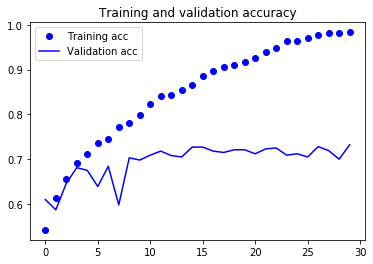

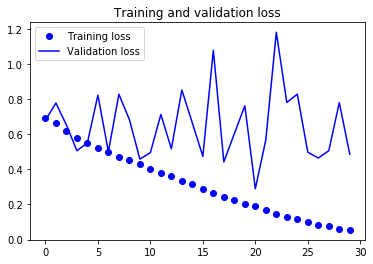

In [22]:
import matplotlib.pyplot as plt
acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(len(acc)) 
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend() 
plt.figure() 
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend() 
plt.show()

In [23]:
datagen=ImageDataGenerator(
    rotation_range=40, #degrees
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode='nearest')

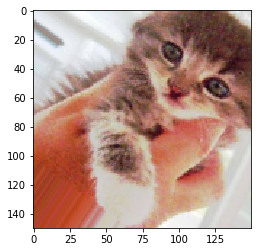

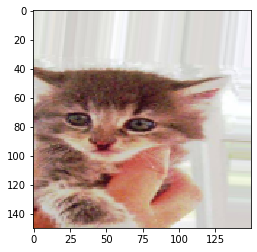

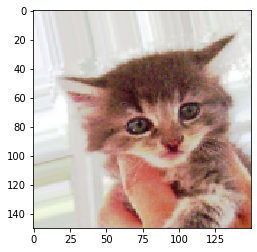

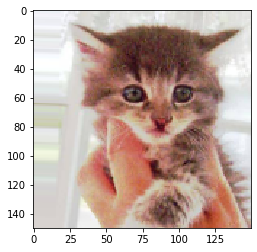

In [24]:
from keras.preprocessing import image # 이미지 전처리 유틸리티 모듈

fnames = sorted([os.path.join(train_cats_dir, fname) for
    fname in os.listdir(train_cats_dir)])

img_path = fnames[3] # 증식할 이미지 선택

# 이미지를 읽고 크기 변경
img = image.load_img(img_path, target_size=(150, 150))
# (150, 150, 3) 크기의 넘파이 배열로 변환, [:,:,0:3] 반환

x = image.img_to_array(img)
x = x.reshape((1,)+x.shape) # (1,150,150,3) 크기로 변환
# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성
# 무한 반복되기 때문에 어느 지점에서 중지해야 합니다!

i = 0
# flow-이미지를 배치 단위로 가져옴
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show() 

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # Flatten 다음, FCN 전
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [26]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) # 검증 데이터는 증식하지 않음

train_generator = train_datagen.flow_from_directory(
    train_dir, # 타깃 디렉터리
    target_size=(150, 150), # 150 × 150 크기로 바꿉니다
    batch_size=32,
    class_mode='binary') # 이진 레이블

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50) 

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 103s 1s/step - loss: 0.6932 - acc: 0.5243 - val_loss: 0.7255 - val_acc: 0.5273
Epoch 2/100
100/100 [==============================] - 102s 1s/step - loss: 0.6789 - acc: 0.5600 - val_loss: 0.6262 - val_acc: 0.5142
Epoch 3/100
100/100 [==============================] - 100s 999ms/step - loss: 0.6673 - acc: 0.5833 - val_loss: 0.6370 - val_acc: 0.5914
Epoch 4/100
100/100 [==============================] - 102s 1s/step - loss: 0.6484 - acc: 0.6159 - val_loss: 0.5902 - val_acc: 0.6469
Epoch 5/100
100/100 [==============================] - 101s 1s/step - loss: 0.6365 - acc: 0.6291 - val_loss: 0.6503 - val_acc: 0.6218
Epoch 6/100
100/100 [==============================] - 102s 1s/step - loss: 0.6203 - acc: 0.6492 - val_loss: 0.6293 - val_acc: 0.6701
Epoch 7/100
100/100 [==============================] - 101s 1s/step - loss: 0.6203 - acc: 0.6578 - val_loss: 

In [27]:
model.save('cats_and_dogs_small_2.h5')

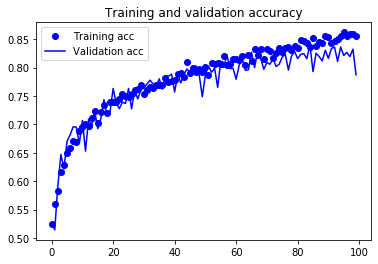

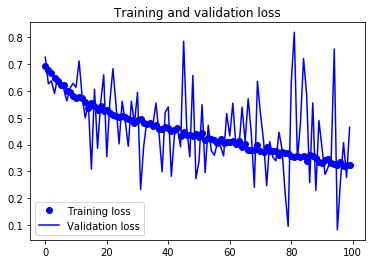

In [28]:
plt.clf()
acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(len(acc)) 
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend() 
plt.figure() 
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend() 
plt.show()

In [29]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
include_top=False, # densely connected classifier
input_shape=(150,150,3)) # optional

58892288/58889256 [==============================] - 20s 0us/step


In [30]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [33]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = 'C:/Users/willk/Desktop/Kim/small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255) # WITHOUT DATA AUGMENTATION

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory, 
        target_size=(150, 150),
        batch_size=20, 
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch) # conv_base = VGG16
        features[i * 20 : (i + 1) * 20] = features_batch
        labels[i * 20 : (i + 1) * 20] = labels_batch
        i += 1
        if i * 20 >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [34]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [35]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.5761 - acc: 0.6975 - val_loss: 0.4276 - val_acc: 0.8550
Epoch 2/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.4279 - acc: 0.8060 - val_loss: 0.3589 - val_acc: 0.8790
Epoch 3/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3458 - acc: 0.8440 - val_loss: 0.3178 - val_acc: 0.8830
Epoch 4/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3126 - acc: 0.8725 - val_loss: 0.2938 - val_acc: 0.8900
Epoch 5/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2749 - acc: 0.8880 - val_loss: 0.2803 - val_acc: 0.8940
Epoch 6/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2609 - acc: 0.8985 - val_loss: 0.2694 - val_acc: 0.8970
Epoch 7/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2463 - acc: 0.8965 - val_loss: 0.2597 - val_acc: 0.8930
Epoch 8/30
200

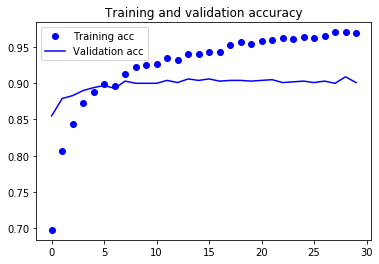

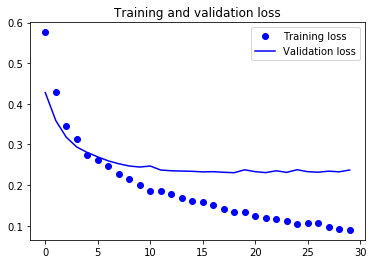

In [36]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [37]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [38]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [39]:
 print('conv_base를 동결하기 전 훈련되는 가중치의 수:', len(model.trainable_weights))

conv_base를 동결하기 전 훈련되는 가중치의 수: 30


In [41]:
 conv_base.trainable = False

In [42]:
 print('conv_base를 동결하기 전 훈련되는 가중치의 수:', len(model.trainable_weights))

conv_base를 동결하기 전 훈련되는 가중치의 수: 4


In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20,
    width_shift_range=0.1, 
    height_shift_range=0.1,
    shear_range=0.1, 
    zoom_range=0.1,
    horizontal_flip=True, 
    fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255)#No augmented!

train_generator = train_datagen.flow_from_directory(
    train_dir, # 타깃 디렉터리
    target_size=(150, 150), # 150 × 150로 변경
    batch_size=20,
    class_mode='binary') # 이진 레이블

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20, 
    class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc']) # augmented!

history = model.fit_generator(
    train_generator, # 2000/100=20 data augmentations
    steps_per_epoch=100, epochs=30,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2) # 진행 막대(progress bar)가 나오지 않도록 설정

Using TensorFlow backend.


NameError: name 'train_dir' is not defined

In [ ]:
conv_base.trainable = False

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else: # freeze before block5_conv1
        layer.trainable = False

In [47]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 380s 4s/step - loss: 0.0123 - acc: 0.9950 - val_loss: 0.0283 - val_acc: 0.9240
Epoch 2/100
100/100 [==============================] - 384s 4s/step - loss: 0.0124 - acc: 0.9950 - val_loss: 0.1523 - val_acc: 0.9260
Epoch 3/100
100/100 [==============================] - 376s 4s/step - loss: 0.0081 - acc: 0.9985 - val_loss: 0.4216 - val_acc: 0.9330
Epoch 4/100
100/100 [==============================] - 374s 4s/step - loss: 0.0084 - acc: 0.9970 - val_loss: 0.1683 - val_acc: 0.9270
Epoch 5/100
100/100 [==============================] - 373s 4s/step - loss: 0.0089 - acc: 0.9965 - val_loss: 0.0094 - val_acc: 0.9260
Epoch 6/100
100/100 [==============================] - 374s 4s/step - loss: 0.0148 - acc: 0.9965 - val_loss: 0.0131 - val_acc: 0.9280
Epoch 7/100
100/100 [==============================] - 374s 4s/step - loss: 0.0066 - acc: 0.9965 - val_loss: 0.4287 - val_acc: 0.9300
Epoch 8/100
100/100 [==============================] - 376s 4s

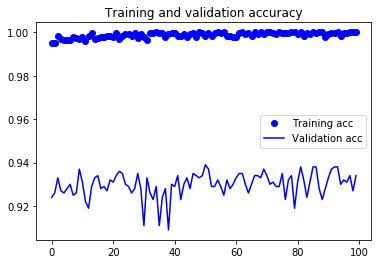

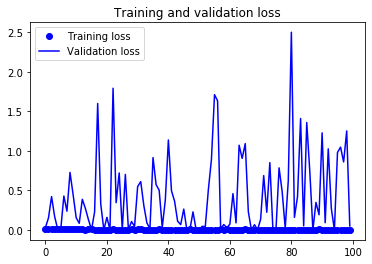

In [48]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

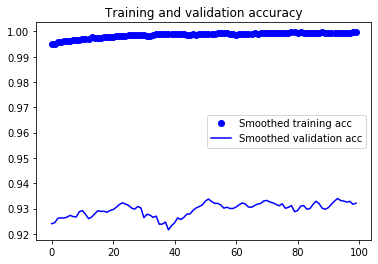

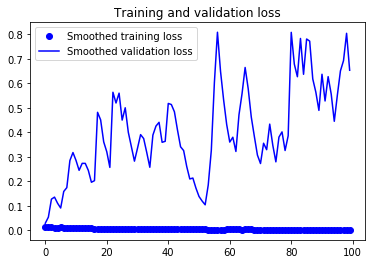

In [50]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [51]:
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 1000 images belonging to 2 classes.
